In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

# Feature engineering libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Kernels for Support Vectors
from sklearn.gaussian_process.kernels import Matern, WhiteKernel

# Regression libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Classification libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# **Data cleaning and preparation**

In [2]:
# Load the data and inspect it
view = pd.read_csv('tableExport.txt')
view

,Ref,Name,Sci_key,C_key,Loc,Type,RA,DEC,Vel,U_mag,...,J_mag,H_mag,K_mag,Teff,logg,Fe/H,Vmic,Simbad_Identifier,Ba/Fe,C/Fe
0,AOK09,S10-14,*,*,DW,RG,10 13 34.7,'-2 7 57.9,233.86,NaN,...,NaN,NaN,15.080,4620,1.2,'-2.71,2.2,[AAS2009]_S_10-14,'-1.31,NaN
1,AOK09,S11-37,*,*,DW,RG,10 13 45.48,'-1 56 16.3,221.79,NaN,...,NaN,NaN,15.340,4560,1.3,'-2.89,2.2,[AAS2009]_S_11-37,'-1.08,NaN
2,AOK09,S12-28,*,*,DW,RG,10 11 17.15,'-2 0 24,201.96,NaN,...,NaN,NaN,14.910,4570,1.4,'-2.8,2.7,[AAS2009]_S_12-28,'-0.28,NaN
3,AOK09,S14-98,*,*,DW,RG,10 13 24.48,'-2 12 3.5,220.7,NaN,...,NaN,NaN,15.610,4730,1.1,'-2.72,2.8,[AAS2009]_S_14-98,'-1.22,NaN
4,AOK09,S15-19,*,*,DW,RG,10 11 26.96,'-2 5 41.6,226.05,NaN,...,NaN,NaN,14.980,4620,1.2,'-3.15,2.6,[AAS2009]_S_15-19,0.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,ROE14b,G64-12,*,*,HA,SG,13 40 2.498,0 2 18.8,442.51,11.601,...,10.509,10.268,10.208,6030,3.6,'-3.58,1.2,Wolf_1492,'-0.27,<1.1
2045,ROE14b,G199-66,*,*,HA,SG,13 20 31.28,56 34 48.3,'-144.94,NaN,...,11.505,11.211,11.176,5560,3.45,'-2.14,1.6,Wolf_481,'-0.87,0.03
2046,NOR97a,G66-30,*,*,HA,MS,14 50 7.80429,0 50 27.1545,'-115.08,NaN,...,10.062,9.842,9.789,6300,4.1,'-1.53,1.5,Wolf_550,0.11,NaN
2047,FUL00,G16-25,*,*,HA,MS,16 1 21.72,5 23 42.8,22.95,NaN,...,12.050,11.670,11.630,5400,4.6,'-1.8,1.3,Wolf_624,'-0.13,NaN


### Table 1. JINAbase Content Description

**Data category** | **Description**
------------------|---------------
**Labels assigned by JINAbase** | JINAbase ID number<br>Priority label: to choose from stars with multiple entries<br>Evolutionary status of star: RG, HB, SG, or MS<br>Label for carbon enhancement: CEMP, or CEMP-no
**Labels assigned by authors** | Label for neutron-capture element enhancement: r-I, r-II, s-rich, i-rich, or r+s stars<br>Location: Halo (HA), bulge (BU), ultra-faint dwarf galaxy (UF), or classical dwarf galaxy (DW)
**Identifiers** | Star name from the respective paper<br>SIMBAD identifier
**Position** | Right ascension (J2000) (from SIMBAD)<br>Declination (J2000) (from SIMBAD)
**Radial Velocity** | Radial velocity (from SIMBAD)<br>Reference for radial velocity (from SIMBAD)
**Magnitudes** | Values for U, B, V, R, I, J, H, K (from SIMBAD)
**Stellar parameters** | Effective temperature, surface gravity, metallicity, microturbulence (from respective paper)
**Chemical abundances** | log<sub>ε</sub>(X), abundances for elements from Li to U, when available<br>log<sub>ε</sub>(X) values for elements with two ionization states (Ca, Ti, Cr, Mn, Fe), when available

*Source : JINAbase*

## Data Removal

In [3]:
# Columns to drop
drop_cols = ['Ref', 'Name', 'Simbad_Identifier']
data = view.drop(columns = drop_cols)
data

,Sci_key,C_key,Loc,Type,RA,DEC,Vel,U_mag,B_mag,V_mag,...,I_mag,J_mag,H_mag,K_mag,Teff,logg,Fe/H,Vmic,Ba/Fe,C/Fe
0,*,*,DW,RG,10 13 34.7,'-2 7 57.9,233.86,NaN,NaN,17.640,...,16.560,NaN,NaN,15.080,4620,1.2,'-2.71,2.2,'-1.31,NaN
1,*,*,DW,RG,10 13 45.48,'-1 56 16.3,221.79,NaN,NaN,17.960,...,16.900,NaN,NaN,15.340,4560,1.3,'-2.89,2.2,'-1.08,NaN
2,*,*,DW,RG,10 11 17.15,'-2 0 24,201.96,NaN,NaN,17.520,...,16.440,NaN,NaN,14.910,4570,1.4,'-2.8,2.7,'-0.28,NaN
3,*,*,DW,RG,10 13 24.48,'-2 12 3.5,220.7,NaN,NaN,18.060,...,17.060,NaN,NaN,15.610,4730,1.1,'-2.72,2.8,'-1.22,NaN
4,*,*,DW,RG,10 11 26.96,'-2 5 41.6,226.05,NaN,NaN,17.540,...,16.530,NaN,NaN,14.980,4620,1.2,'-3.15,2.6,0.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,*,*,HA,SG,13 40 2.498,0 2 18.8,442.51,11.601,11.832,11.451,...,10.892,10.509,10.268,10.208,6030,3.6,'-3.58,1.2,'-0.27,<1.1
2045,*,*,HA,SG,13 20 31.28,56 34 48.3,'-144.94,NaN,13.380,12.630,...,12.600,11.505,11.211,11.176,5560,3.45,'-2.14,1.6,'-0.87,0.03
2046,*,*,HA,MS,14 50 7.80429,0 50 27.1545,'-115.08,NaN,11.470,11.070,...,10.700,10.062,9.842,9.789,6300,4.1,'-1.53,1.5,0.11,NaN
2047,*,*,HA,MS,16 1 21.72,5 23 42.8,22.95,NaN,13.920,13.330,...,13.000,12.050,11.670,11.630,5400,4.6,'-1.8,1.3,'-0.13,NaN


In [4]:
# Checking the data types
data.dtypes

Sci_key     object
C_key       object
Loc         object
Type        object
RA          object
DEC         object
Vel         object
U_mag      float64
B_mag      float64
V_mag      float64
R_mag      float64
I_mag      float64
J_mag      float64
H_mag      float64
K_mag      float64
Teff         int64
logg        object
Fe/H        object
Vmic       float64
Ba/Fe       object
C/Fe        object
dtype: object

## Structure errors

* Vel, logg, Fe/H, Ba/Fe being object types indicate that they might have structural erros or characters mixed in with numerical data recorded and the intuition was right. Below is the error generated before structuring the data.

```
ValueError Traceback (most recent call last)
Cell In[12], line 4
2 columns_to_convert = ['VeI', 'Logg', 'Fe/H', 'Ba/Fe']
3 for column in columns_to_convert:
----> 4 data[column] = data[column].astype('float64')

File ~/anaconda3/envs/env1/lib/python3.9/site-packages/pandas/core/generic.py:6643, in NDFrame.astype(self, dtype, copy, errors)
6637 results = [
6638 ser.astype(dtype, copy=copy, errors=errors) for _, ser in self.items()
6639 ]
6641 else:
6642 # else, only a single dtype is given
-> 6643 new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
6644 res = self.constructor_from_mgr(new_data, axes=new_data.axes)
6645 return res.finalize(self, method="astype")

File ~/anaconda3/envs/env1/lib/python3.9/site-packages/pandas/core/internals/managers.py:430, in BaseBlockManager.astype(self, dtype, copy, errors)
427 elif using_copy_on_write():
428 copy = False
--> 430 return self.apply(
431 "astype",
432 dtype=dtype,
433 copy=copy,
434 errors=errors,
435 )

File ~/anaconda3/envs/env1/lib/python3.9/site-packages/pandas/core/internals/blocks.py:135, in Block.astype(self, dtype, copy, errors)
132 # Explicit copy, or required since NumPy can't view from / to object.
133 return arr.astype(dtype, copy=True)
--> 135 return arr.astype(dtype, copy=copy)

ValueError: could not convert string to float: "'-282.6"
```

* Address structural issues in the dataset, such as inconsistencies in data formats, naming conventions, or variable types. Standardize formats, correct naming discrepancies, and ensure uniformity in data representation. Fixing structure errors enhances data consistency and facilitates accurate analysis and interpretation.

*Source : geeksforgeeks.org*

In [5]:
# Defining a function to remove structure errors
def remove_leading_chars(cell):
    if isinstance(cell, str) and cell[0] in ("'", "<", ">"):
        return cell[1:]
    return cell

# Apply the function to the data
data = data.map(remove_leading_chars)

In [6]:
# Convert certain columns to float64 type
fix_cols = ['Vel', 'logg', 'Fe/H', 'Ba/Fe', 'C/Fe']
for column in fix_cols:
    data[column] = data[column].astype('float64')

# Checking data types once again   
data.dtypes

Sci_key     object
C_key       object
Loc         object
Type        object
RA          object
DEC         object
Vel        float64
U_mag      float64
B_mag      float64
V_mag      float64
R_mag      float64
I_mag      float64
J_mag      float64
H_mag      float64
K_mag      float64
Teff         int64
logg       float64
Fe/H       float64
Vmic       float64
Ba/Fe      float64
C/Fe       float64
dtype: object

## Missing Data

In [7]:
data.isnull().sum(axis = 0)

Sci_key       0
C_key         0
Loc           0
Type          0
RA            4
DEC           4
Vel         372
U_mag      1773
B_mag       357
V_mag       329
R_mag       873
I_mag      1146
J_mag       408
H_mag       408
K_mag       391
Teff          0
logg          0
Fe/H          0
Vmic        107
Ba/Fe         0
C/Fe        692
dtype: int64

In [8]:
# Dropping columns with too many missing values
drop_cols2 = ['U_mag', 'I_mag']
data = data.drop(columns = drop_cols2)

# Drop rows with NaN values in 'C/Fe'
data['C/Fe'] = data['C/Fe'].fillna(0)

# Copy Vmic with NaNs to new dataframe
param_est = data[data['Vmic'].isna()].copy()

# Drop the Vmic with NaNs from the original dataframe
data = data.dropna(subset = ['Vmic']).reset_index(drop = True)

# Fill NaNs in numerical columns with zeroes
data.fillna(0, inplace = True)
data.isnull().sum(axis = 0)

Sci_key    0
C_key      0
Loc        0
Type       0
RA         0
DEC        0
Vel        0
B_mag      0
V_mag      0
R_mag      0
J_mag      0
H_mag      0
K_mag      0
Teff       0
logg       0
Fe/H       0
Vmic       0
Ba/Fe      0
C/Fe       0
dtype: int64

# **Exploratory Data Analysis**

## Descriptive Statistics

In [9]:
# Select only numerical columns
numerical_data = data.select_dtypes(include = ['number'])

# Get descriptive statistics for specified columns
print(numerical_data.describe())

               Vel        B_mag        V_mag        R_mag        J_mag  \
count  1942.000000  1942.000000  1942.000000  1942.000000  1942.000000   
mean      4.901725    10.821343    10.513306     7.229783     8.984316   
std     137.951618     5.669534     5.373436     6.554111     5.153764   
min   -1164.000000     0.000000     0.000000     0.000000     0.000000   
25%     -67.175000     8.850000     8.340000     0.000000     6.371750   
50%       0.000000    13.370000    12.835000     8.520000    11.002000   
75%      79.450000    14.850000    14.390000    13.500000    13.039250   
max     488.800000    22.600000    19.850000    18.696000    16.735000   

             H_mag        K_mag         Teff         logg         Fe/H  \
count  1942.000000  1942.000000  1942.000000  1942.000000  1942.000000   
mean      8.658755     8.709624  5349.924820     2.563836    -2.563785   
std       5.025561     4.959335   696.332977     1.251408     0.799353   
min       0.000000     0.000000  3900

## Bar Plots

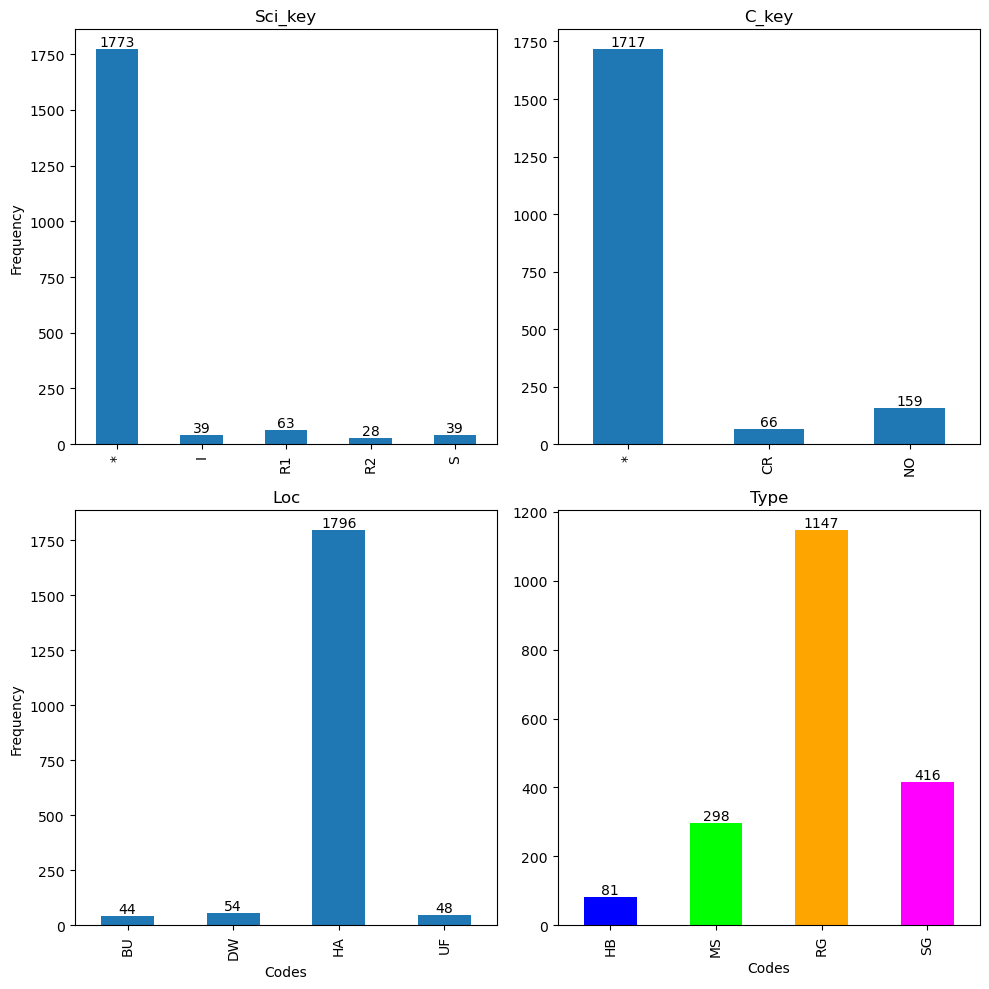

In [10]:
# Define a color map for the plots
color_map = {
    'RG': 'orange',
    'MS': 'lime',
    'SG': 'magenta',
    'HB': 'blue'
}

# List of categorical columns
obj_cols = ['Sci_key', 'C_key', 'Loc', 'Type']

# Create subplots: 2 rows, 2 columns
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

# Plot each column on a separate subplot
for i, column in enumerate(obj_cols):    
    # Calculate the value counts for the current column
    counts = data[column].value_counts().sort_index()
    
    if column == 'Type':
        # Apply the color map for the 'Type' column
        colors = [color_map[key] for key in counts.index]
        counts.plot(ax = ax[i // 2][i % 2], kind='bar', color=colors, title=column)
    else:
        # Default color for other columns
        counts.plot(ax = ax[i // 2][i % 2], kind='bar', title=column)
    
    # Set labels
    ax[i // 2][i % 2].set_xlabel('Codes' if i // 2 == 1 else '')
    ax[i // 2][i % 2].set_ylabel('Frequency' if i % 2 == 0 else '')
    
    # Annotate each bar with its count
    for idx, count in enumerate(counts):
        ax[i // 2][i % 2].text(idx, count, str(count), ha = 'center', va = 'bottom')

plt.tight_layout()

# Save the plot
plt.savefig('Figures/bar_plot.png', dpi = 300)
plt.show()

## Correlation Heatmap

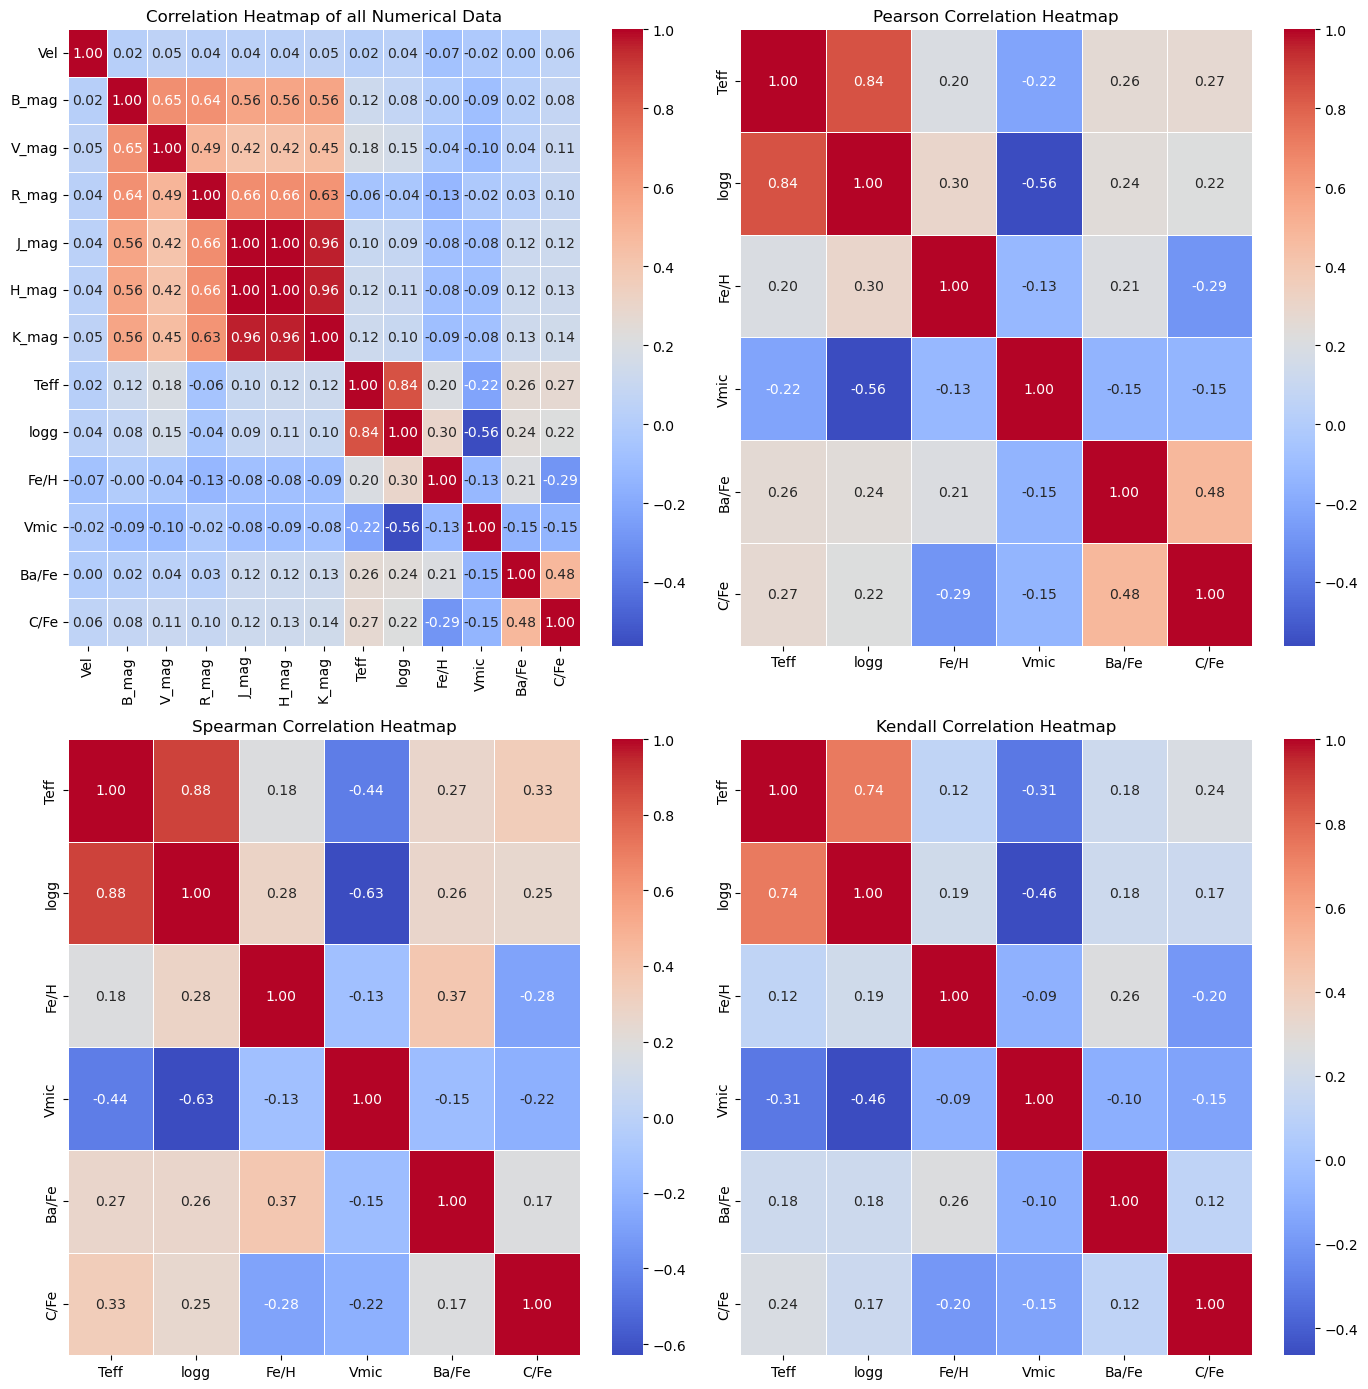

In [11]:
# Columns to calculate for Spearman & Kendall
subset_data = data[['Teff', 'logg', 'Fe/H', 'Vmic', 'Ba/Fe', 'C/Fe']]

# Compute the correlation matrices
full_matrix = numerical_data.corr(method = 'pearson')
pearson = subset_data.corr(method = 'pearson')
spearman = subset_data.corr(method = 'spearman')
kendall = subset_data.corr(method = 'kendall')

# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize = (14, 14))

# Draw the Pearson heatmap
sns.heatmap(full_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, ax = axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap of all Numerical Data')

sns.heatmap(pearson, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, ax = axes[0, 1])
axes[0, 1].set_title('Pearson Correlation Heatmap')

# Draw the Spearman heatmap
sns.heatmap(spearman, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, ax = axes[1, 0])
axes[1, 0].set_title('Spearman Correlation Heatmap')

# Draw the Kendall heatmap
sns.heatmap(kendall, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, ax = axes[1, 1])
axes[1, 1].set_title('Kendall Correlation Heatmap')

plt.tight_layout()

# Save the plot
plt.savefig('Figures/correlation_heatmaps.png', dpi = 300)
plt.show()

## Box plots

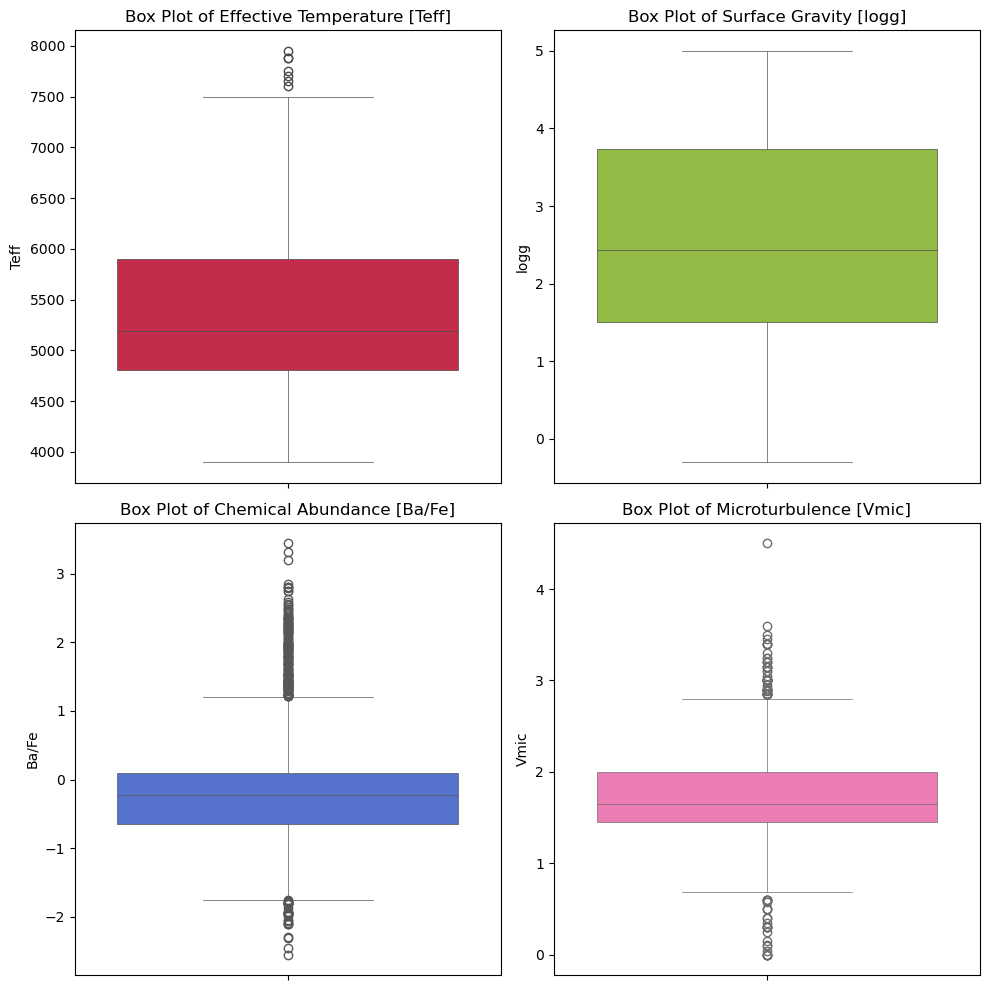

In [12]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# Draw the violin plots
sns.boxplot(y = data['Teff'], linewidth = 0.5, color = 'crimson', ax = axes[0, 0])
axes[0, 0].set_title('Box Plot of Effective Temperature [Teff]')

sns.boxplot(y = data['logg'], linewidth = 0.5, color = 'yellowgreen', ax = axes[0, 1])
axes[0, 1].set_title('Box Plot of Surface Gravity [logg]')

sns.boxplot(y = data['Ba/Fe'], linewidth = 0.5, color = 'royalblue', ax = axes[1, 0])
axes[1, 0].set_title('Box Plot of Chemical Abundance [Ba/Fe]')

sns.boxplot(y = data['Vmic'], linewidth = 0.5, color = 'hotpink', ax = axes[1, 1])
axes[1, 1].set_title('Box Plot of Microturbulence [Vmic]')

plt.tight_layout()

# Save the plot
plt.savefig('Figures/box_plots.png', dpi = 300)
plt.show()

## Outlier Removal

In [13]:
# List of types
types = ['RG', 'SG', 'MS', 'HB']

# Define the columns to consider
iqr_cols = ['Vmic', 'Teff', 'logg']

# Loop through each type and remove outliers using IQR
for type_ in types:
    # Filter the data for the current type
    type_df = data[data['Type'] == type_]
    
    # Initialize a mask for filtering outliers
    mask = pd.Series([True] * len(type_df), index=type_df.index)
    
    # Apply IQR outlier removal for each column
    for col in iqr_cols:
        Q1 = type_df[col].quantile(0.25)
        Q3 = type_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update the mask to filter out outliers
        mask = mask & (type_df[col] >= lower_bound) & (type_df[col] <= upper_bound)
    
    # Update the original DataFrame to remove outliers
    type_df_filtered = type_df[mask]
    
    # Replace the original data with filtered data
    data = pd.concat([data[data['Type'] != type_], type_df_filtered])

# Optimizing the DataFrame for faster training
data_task = pd.DataFrame()

# Columns to copy
copy_cols = ['Type', 'Vmic', 'Teff', 'logg', 'C/Fe']
data_task[copy_cols] = data[copy_cols]
data_task.reset_index(drop = True, inplace = True)

## Dimensionality Reduction

In [14]:
# Initialize the scaler
tsne_scaler = StandardScaler()

# Scale the entire dataset
X_scaled = tsne_scaler.fit_transform(data_task[['Teff', 'logg']])

# Create a t-SNE instance
tsne = TSNE(n_components = 1, perplexity = 100, max_iter = 2000, random_state = 10)

# Fit and transform the scaled data
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the original DataFrame
data_task['tSNE'] = X_tsne[:, 0]

# Reset index if necessary
data_task.reset_index(drop = True, inplace = True)

## Scatter Plots

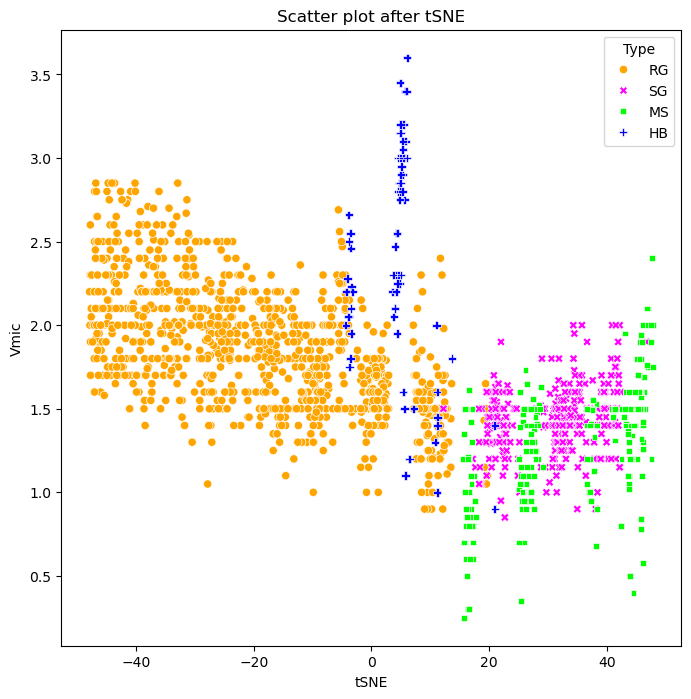

In [15]:
# Set figure size
plt.figure(figsize=(8, 8))

# Plot and show
sns.scatterplot(x = data_task['tSNE'], y = data_task['Vmic'], style = data_task['Type'], hue = data_task['Type'], palette = color_map)
plt.title('Scatter plot after tSNE')
plt.show()

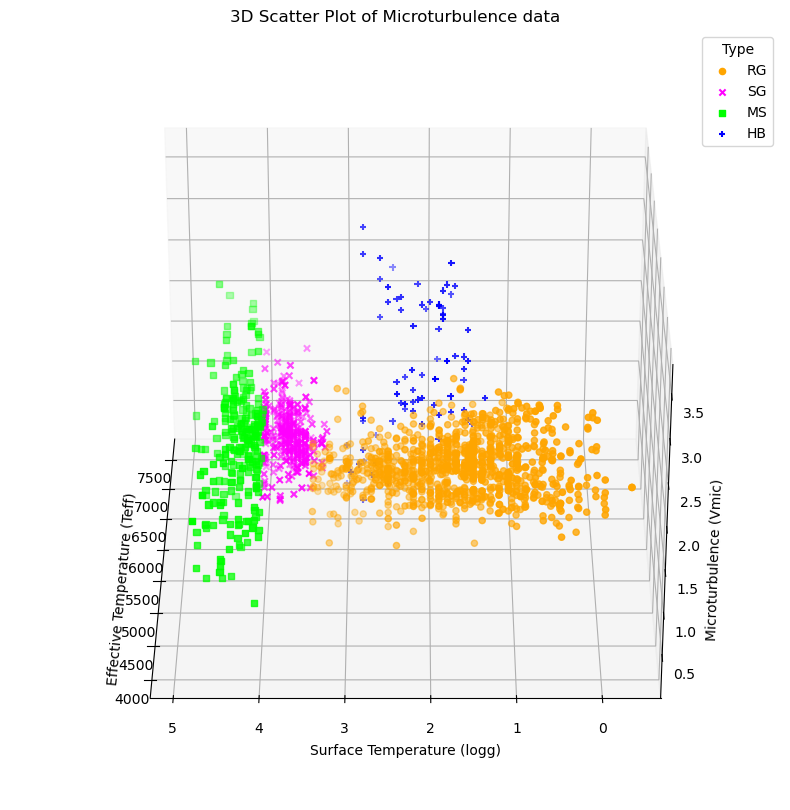

In [16]:
# Generating 3D plots for report
# Define a color map for the plots
marker_map = {
    'RG': 'o',
    'MS': 's',
    'SG': 'x',
    'HB': '+'
}

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

for type_ in data_task['Type'].unique():
    type_df = data_task[data_task['Type'] == type_]
    ax.scatter(type_df['Teff'], type_df['logg'], type_df['Vmic'], c = color_map[type_], marker = marker_map[type_], label = type_)

ax.set_title('3D Scatter Plot of Microturbulence data')
ax.set_xlabel('Effective Temperature (Teff)')
ax.set_ylabel('Surface Temperature (logg)')
ax.set_zlabel('Microturbulence (Vmic)')

# Custom legend
ax.legend(title = 'Type')

# Rotate the plot
ax.view_init(elev = 30, azim = 180)

# Save the plot as an image file
fig.savefig('Figures/3d_scatter_plot.png', dpi = 300)
plt.show()

In [17]:
# Create a 3D scatter plot
fig = go.Figure()

for type_ in data_task['Type'].unique():
    type_df = data_task[data_task['Type'] == type_]
    fig.add_trace(
        go.Scatter3d
        (
            x = type_df['Teff'], y = type_df['logg'], z = type_df['Vmic'], mode = 'markers',
            marker = dict(size = 4, color = color_map[type_],), name = type_
        ))
# Custom title and legend
fig.update_layout(
    title =
    {
        'text': '3D Scatter Plot of Microturbulence data',
        'font': {'size': 24, 'family': 'Times New Roman', 'color': 'black', 'weight': 'bold'},
        'x': 0.5, 'xanchor': 'right'
    },
    scene = dict
    (
        xaxis_title = 'Effective Temperature (Teff)', yaxis_title = 'Surface Temperature (logg)', 
        zaxis_title = 'Microturbulence (Vmic)'),
    legend = dict
    (
        font = dict(family = 'Times New Roman', size = 16)
    ))

# Save the plot as an HTML file
fig.write_html('Figures/3d_scatter_plot.html')

## Histograms

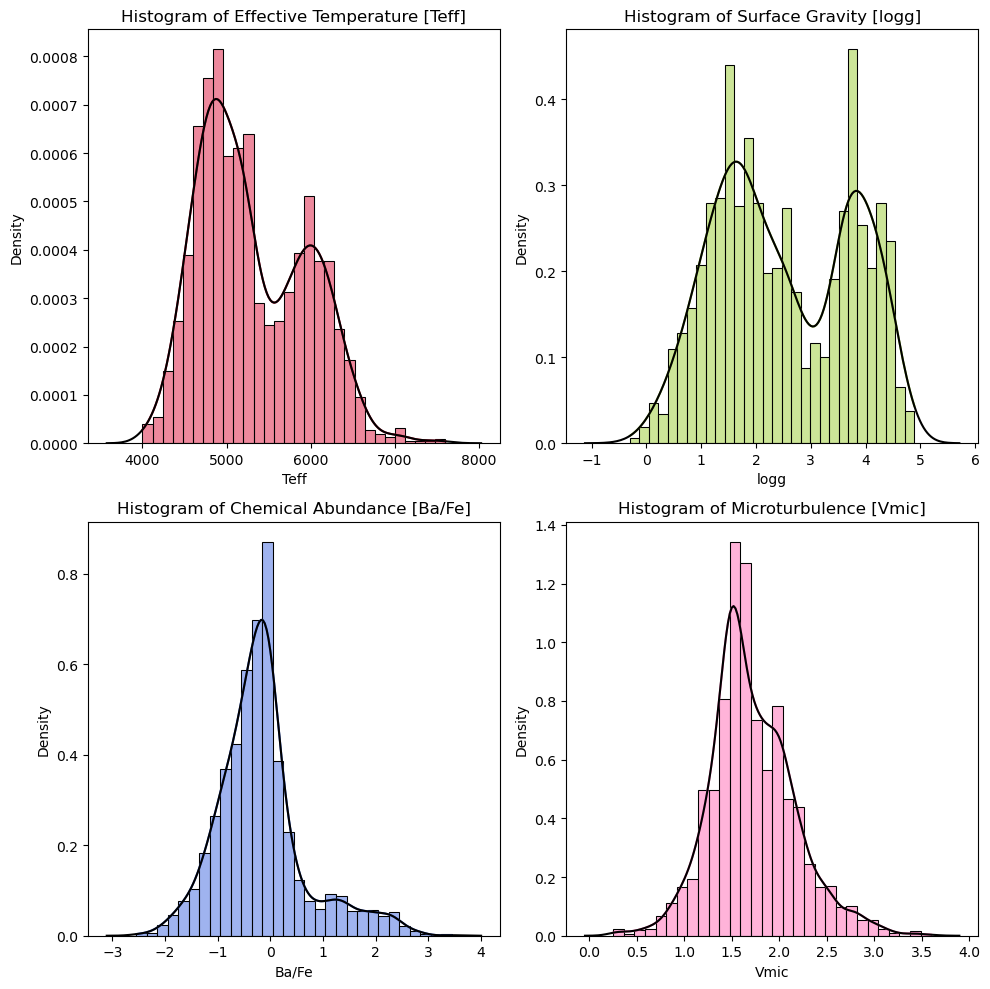

In [18]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Draw the histograms
sns.histplot(data_task['Teff'], bins = 30, color = 'crimson', kde = True, stat = 'density', ax = axes[0, 0])
sns.kdeplot(data_task['Teff'], color = 'black', ax = axes[0, 0])
axes[0, 0].set_title('Histogram of Effective Temperature [Teff]')
axes[0, 0].set_xlabel('Teff')

sns.histplot(data_task['logg'], bins = 30, color = 'yellowgreen', kde = True, stat = 'density', ax = axes[0, 1])
sns.kdeplot(data_task['logg'], color = 'black', ax = axes[0, 1])
axes[0, 1].set_title('Histogram of Surface Gravity [logg]')
axes[0, 1].set_xlabel('logg')

sns.histplot(data['Ba/Fe'], bins = 30, color = 'royalblue', kde = True, stat = 'density', ax = axes[1, 0])
sns.kdeplot(data['Ba/Fe'], color = 'black', ax = axes[1, 0])
axes[1, 0].set_title('Histogram of Chemical Abundance [Ba/Fe]')
axes[1, 0].set_xlabel('Ba/Fe')

sns.histplot(data_task['Vmic'], bins = 30, color = 'hotpink', kde = True, stat = 'density', ax = axes[1, 1])
sns.kdeplot(data_task['Vmic'], color = 'black', ax = axes[1, 1])
axes[1, 1].set_title('Histogram of Microturbulence [Vmic]')
axes[1, 1].set_xlabel('Vmic')

plt.tight_layout()

# Save the plot
plt.savefig('Figures/histograms.png', dpi = 300)
plt.show()

## Clustering

# **Regression (Imputation)**

## Train-test split

In [19]:
X = data_task[['tSNE']].values
y = data_task['Vmic'].values  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest

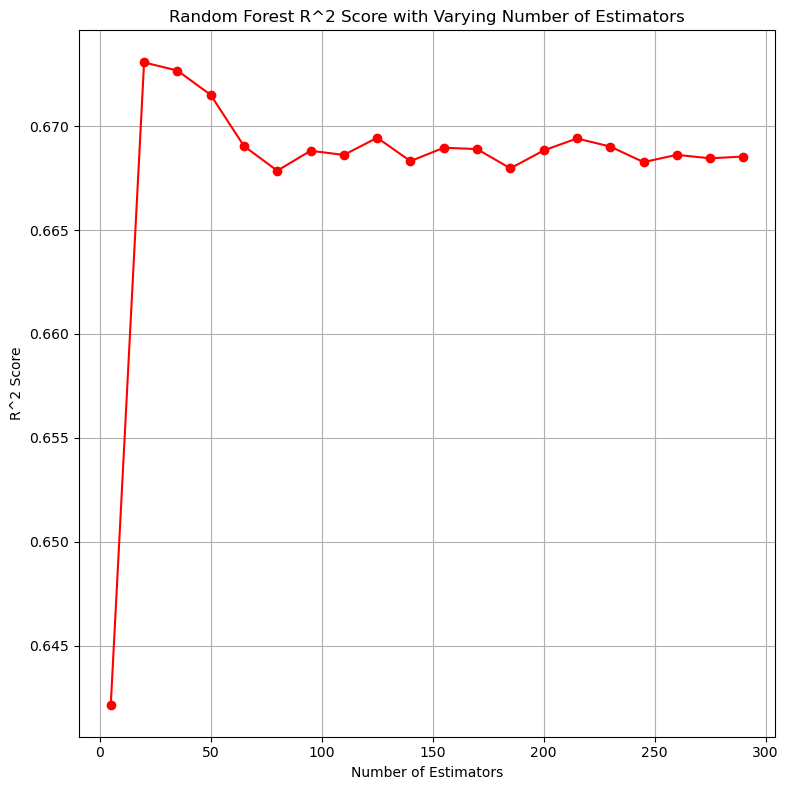

In [20]:
# Define the range of n_estimators
n_estimators_range = np.arange(5, 300, 15)

# List to store the R^2 scores
r2_rf = []

# Loop over the range of n_estimators
for n_estimators in n_estimators_range:
    # Create and train the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = 7, random_state = 10)
    rf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    
    # Append the R^2 score to the list
    r2_rf.append(r2)

# Plot R^2 Score against n_estimators
plt.figure(figsize=(8, 8))
plt.plot(n_estimators_range, r2_rf, marker = 'o', color = 'r', label = 'R^2 Score')
plt.title('Random Forest R^2 Score with Varying Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('Figures/performance_0.png', dpi = 300)
plt.show()

In [21]:
# Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 30, max_depth = 7, random_state = 10)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.06810724050048096
R^2 Score: 0.6741365049486903


## Support Vector Regressor

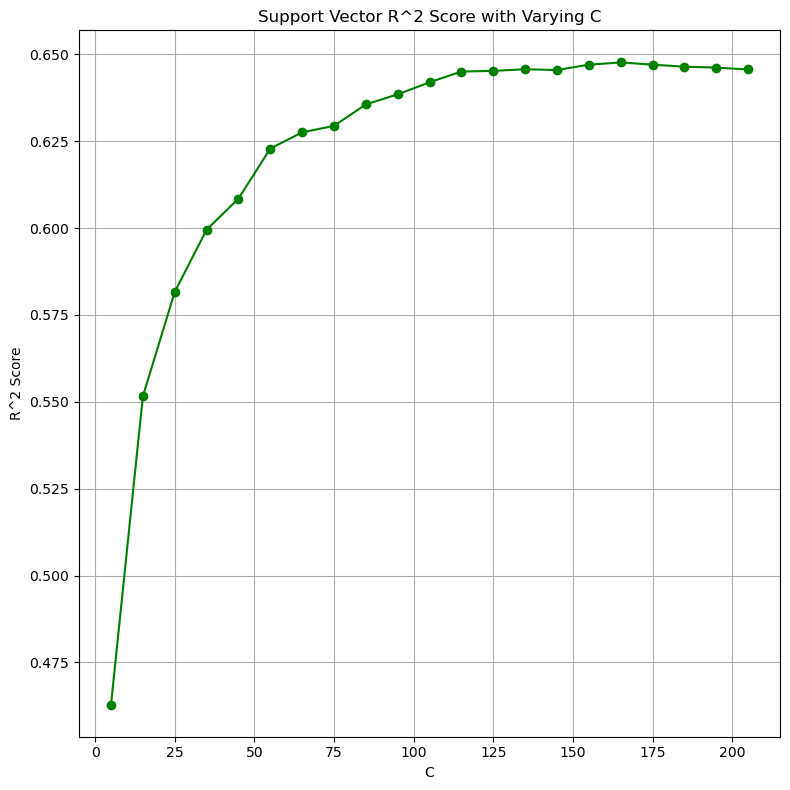

In [22]:
# Define the range of n_estimators
regularization_range = np.arange(5, 210, 10)

# List to store the R^2 scores
r2_svr = []

# Loop over the range of n_estimators
for c in regularization_range:
    # Custom Kernel
    custom_kernel = Matern() + WhiteKernel()

    # Create and train the Support Vector Regressor
    svr = SVR(kernel = custom_kernel, C = c, epsilon = 0.1)
    svr.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svr.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    
    # Append the R^2 score to the list
    r2_svr.append(r2)

# Plot R^2 Score against n_estimators
plt.figure(figsize=(8, 8))
plt.plot(regularization_range, r2_svr, marker = 'o', color = 'g', label = 'R^2 Score')
plt.title('Support Vector R^2 Score with Varying C')
plt.xlabel('C')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('Figures/performance_1.png', dpi = 300)
plt.show()

In [23]:
# Custom Kernel
custom_kernel = Matern() + WhiteKernel()

# Create and train the Support Vector Regressor
svr = SVR(kernel = custom_kernel, C = 155, epsilon = 0.1)
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.07377940135493366
R^2 Score: 0.6469976846567107


## KNN Regressor

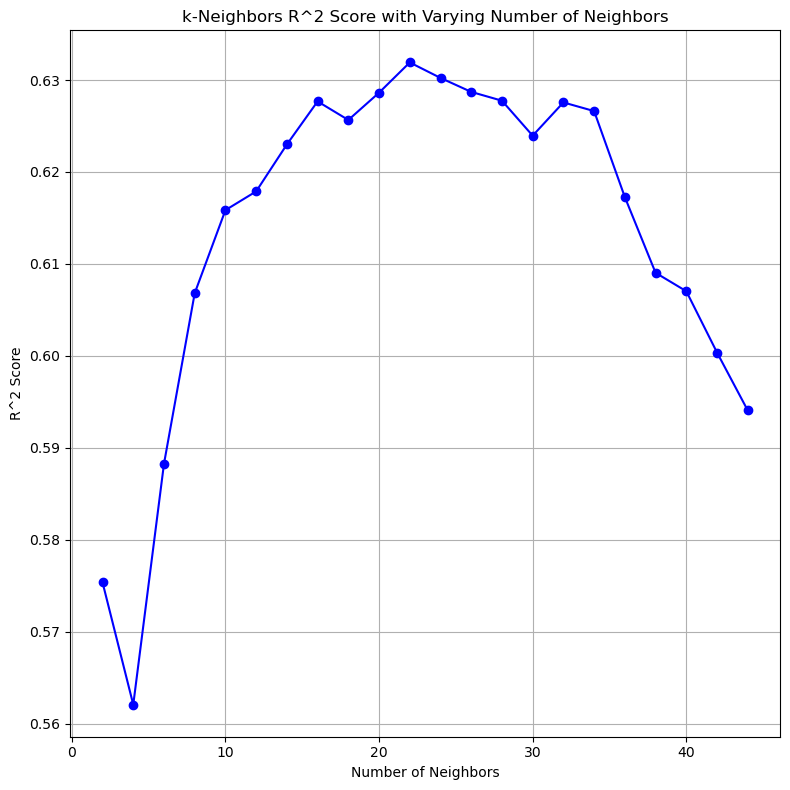

In [24]:
# Define the range of n_estimators
n_neighbors_range = np.arange(2, 45, 2)

# List to store the R^2 scores
r2_knn = []

# Loop over the range of n_estimators
for n in n_neighbors_range:
    # Create and train the Random Forest Regressor
    knn = KNeighborsRegressor(n_neighbors = n, weights = 'uniform')
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    
    # Append the R^2 score to the list
    r2_knn.append(r2)

# Plot R^2 Score against n_estimators
plt.figure(figsize = (8, 8))
plt.plot(n_neighbors_range, r2_knn, marker = 'o', color = 'b', label = 'R^2 Score')
plt.title('k-Neighbors R^2 Score with Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('Figures/performance_2.png', dpi = 300)
plt.show()

In [25]:
# Create and train the K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors = 22, weights = 'uniform')
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.07693241499730508
R^2 Score: 0.6319118870543199


## XGBoost

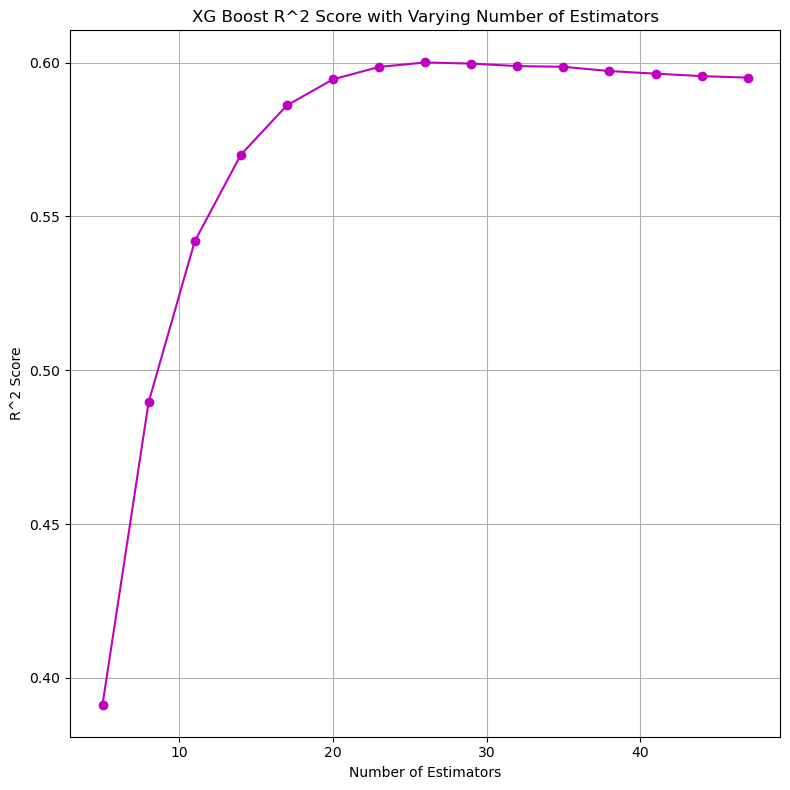

In [26]:
# Define the range of n_estimators
estimators_range = np.arange(5, 50, 3)

# List to store the R^2 scores
r2_xgb = []

# Loop over the range of n_estimators
for n_estimators in estimators_range:
    # Create and train the Random Forest Regressor
    xgb = XGBRegressor(n_estimators = n_estimators, learning_rate = 0.1, random_state = 10)
    xgb.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = xgb.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    
    # Append the R^2 score to the list
    r2_xgb.append(r2)

# Plot R^2 Score against n_estimators
plt.figure(figsize=(8, 8))
plt.plot(estimators_range, r2_xgb, marker = 'o', color = 'm', label = 'R^2 Score')
plt.title('XG Boost R^2 Score with Varying Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('Figures/performance_3.png', dpi = 300)
plt.show()

In [27]:
# Create and train the XGBoost Regressor
xgb = XGBRegressor(n_estimators = 26, learning_rate = 0.1, random_state = 10)
xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.08358806759119494
R^2 Score: 0.6000674869559639


## Multilayer Perceptron

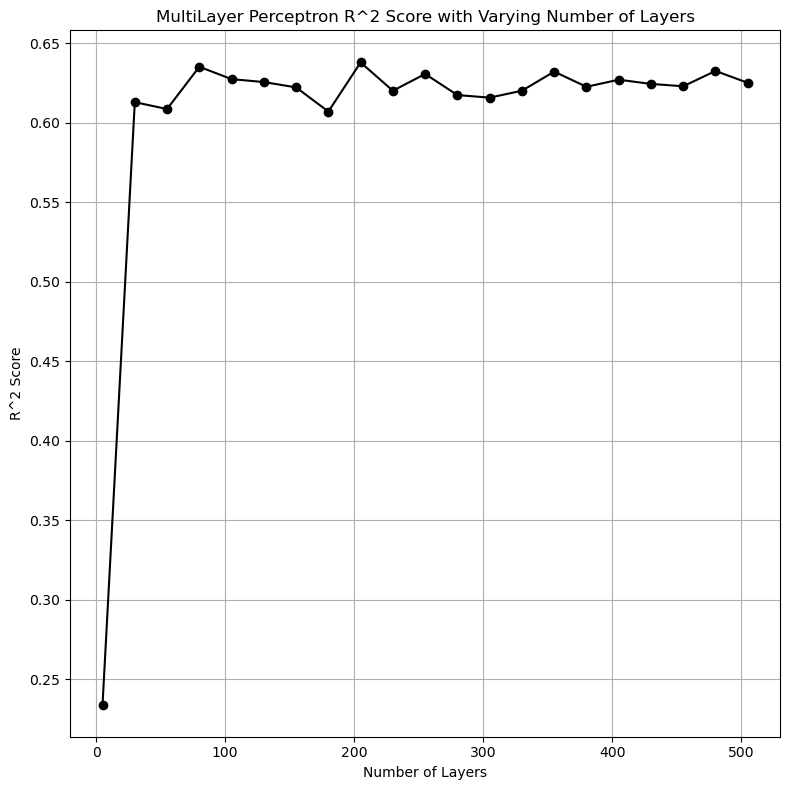

In [28]:
# Define the range of n_estimators
layer_sizes = np.arange(5, 525, 25)

# List to store the R^2 scores
r2_mlp = []

# Loop over the range of n_estimators
for layer in layer_sizes:
    # Create and train the Random Forest Regressor
    mlp = MLPRegressor(hidden_layer_sizes = (layer,), activation = 'relu', solver = 'lbfgs', max_iter = 5000, random_state = 10)
    mlp.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = mlp.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    
    # Append the R^2 score to the list
    r2_mlp.append(r2)

# Plot R^2 Score against n_estimators
plt.figure(figsize=(8, 8))
plt.plot(layer_sizes, r2_mlp, marker = 'o', color = 'k', label = 'R^2 Score')
plt.title('MultiLayer Perceptron R^2 Score with Varying Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('Figures/performance_4.png', dpi = 300)
plt.show()

In [29]:
# Create and train the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes = (80,), activation = 'relu', solver = 'lbfgs', max_iter = 5000, random_state = 10)
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.07624282839580741
R^2 Score: 0.6352112587283638


## Predictions

In [30]:
# Initialize the new column for predictions
param_est['pred_Vmic'] = None  

# Scale the entire dataset
X_scaled_pred = tsne_scaler.fit_transform(param_est[['Teff', 'logg', 'C/Fe']])

# Fit and transform the scaled data
X_tsne_pred = tsne.fit_transform(X_scaled_pred)

# Add t-SNE results to the original DataFrame
param_est['tSNE'] = X_tsne_pred[:, 0]

# Reset index if necessary
param_est.reset_index(drop = True, inplace = True)

In [31]:
X = param_est[['tSNE']].values
X_scaled = scaler.fit_transform(X)

# Make predictions
y_pred = rf.predict(X_scaled)

# Add t-SNE results to the original DataFrame
param_est['pred_Vmic'] = y_pred

# Reset index if necessary
param_est.reset_index(drop = True, inplace = True)

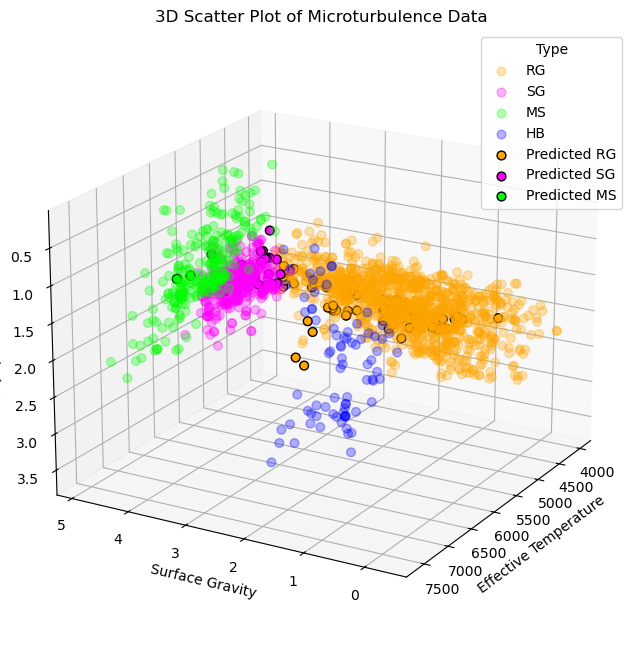

In [32]:
# Generating 3D scatter plot for GitHub
# Create a 3D scatter plot
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Plot the data points
for type_ in data_task['Type'].unique():
    type_df = data_task[data_task['Type'] == type_]
    ax.scatter(type_df['Teff'], type_df['logg'], type_df['Vmic'], color = color_map[type_], label = type_, s = 40, alpha = 0.3)

# Highlight predicted values
for type_ in param_est['Type'].unique():
    highlight_data = param_est[param_est['Type'] == type_]
    ax.scatter(highlight_data['Teff'], highlight_data['logg'], highlight_data['pred_Vmic'], color = color_map[type_], 
               label = f'Predicted {type_}', edgecolor = 'black', s = 40, alpha = 1)

# Custom title and labels
ax.set_title('3D Scatter Plot of Microturbulence Data')
ax.set_xlabel('Effective Temperature')
ax.set_ylabel('Surface Gravity')
ax.set_zlabel('Microturbulence')

# Custom legend
ax.legend(title = 'Type')

# Rotate the plot
ax.view_init(elev = 200, azim = 150)

# Save the plot as an HTML file (as an image instead)
plt.savefig('Figures/Final_plot.png', dpi = 300)
plt.show()

In [33]:
# Create a 3D scatter plot
fig = go.Figure()

for type_ in data_task['Type'].unique():
    type_df = data_task[data_task['Type'] == type_]
    fig.add_trace(
        go.Scatter3d
        (
            x = type_df['Teff'], y = type_df['logg'], z = type_df['Vmic'], mode = 'markers',
            marker = dict(size = 4, color = color_map[type_],), name = type_
        ))
    
for type_ in param_est['Type'].unique():
    highlight_data = param_est[param_est['Type'] == type_]
    fig.add_trace(
        go.Scatter3d(
            x = highlight_data['Teff'], y = highlight_data['logg'], z = highlight_data['pred_Vmic'], mode = 'markers',
            marker = dict(size = 4, color = color_map[type_], line = dict(color = 'black', width = 2)), 
            name=f'Predicted {type_}'
        ))

# Custom title and legend
fig.update_layout(
    title =
    {
        'text': '3D Scatter Plot of Microturbulence data',
        'font': {'size': 24, 'family': 'Times New Roman', 'color': 'black', 'weight': 'bold'},
        'x': 0.5, 'xanchor': 'right'
    },
    scene = dict(xaxis_title = 'Effective Temperature', yaxis_title = 'Surface Gravity', zaxis_title = 'Microturbulence'),
    legend = dict(font = dict(family = 'Times New Roman', size = 16)))

# Save the plot as an HTML file
fig.write_html('Figures/Final_plot.html')

# **Task 2 : Classification**

In [34]:
# Load features and target
X = data_task[['Vmic', 'Teff', 'logg']]
y = data_task['Type']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 10)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators = 30, max_depth = None, random_state = 10),
    'SVM': SVC(C = 100, kernel = custom_kernel, gamma = 'scale', random_state = 10),
    'KNN': KNeighborsClassifier(n_neighbors = 22, weights = 'distance'),
    'XGBoost': XGBClassifier(n_estimators = 26, learning_rate = 0.1, random_state = 10),
    'MLP': MLPClassifier(hidden_layer_sizes = (80,), max_iter = 5000, activation = 'relu', solver = 'lbfgs', random_state = 10)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names = label_encoder.classes_))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Random Forest Classification Report:

              precision    recall  f1-score   support

          HB       1.00      1.00      1.00        23
          MS       1.00      1.00      1.00        55
          RG       1.00      0.99      1.00       227
          SG       0.97      1.00      0.98        63

    accuracy                           0.99       368
   macro avg       0.99      1.00      0.99       368
weighted avg       0.99      0.99      0.99       368

Confusion Matrix:
[[ 23   0   0   0]
 [  0  55   0   0]
 [  0   0 225   2]
 [  0   0   0  63]]

SVM Classification Report:

              precision    recall  f1-score   support

          HB       0.95      0.91      0.93        23
          MS       1.00      0.96      0.98        55
          RG       0.99      0.99      0.99       227
          SG       0.94      1.00      0.97        63

    accuracy                           0.98       368
   macro avg       0.97      0.97      0.97       368
weighted avg       0.98